# Airbnb Listings Project

## Description

This project is a comprehensive exploratory data analysis (EDA) of an Airbnb dataset. The goal is to uncover key insights about property listings, pricing trends, and customer behaviour across various neighbourhoods and room types.
Using Python libraries such as **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, we perform data cleaning, visualization and interpretation of trends to answer business-relevant questions.

## Import Libraries

In [1]:

# numpy: For numerical operations and array handling
# pandas: For data manipulation and analysis with DataFrame structures
# matplotlib.pyplot: For creating static visualizations
# seaborn: For enhanced statistical visualizations based on matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
# Read the Airbnb dataset from a CSV file into a pandas DataFrame
# The low_memory=False parameter prevents mixed type inference issues with large files
df = pd.read_csv("airbnb_Open_Data.csv", low_memory=False)

In [3]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Explore Column Names

In [4]:
# Get the column names of the DataFrame 'df'
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

## Checking Missing Values

In [5]:
# Check for missing values in the dataframe and display the count of null values for each column
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

# Handling Missing Values

In [6]:
# Convert 'last review' column to datetime format
# The 'errors='coerce'' parameter will convert invalid dates to NaT (Not a Time) values
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

In [7]:
# Display concise summary of the DataFrame including:
# - Total number of entries
# - Column names and their data types
# - Non-null value counts
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [8]:
# Fill missing values in 'reviews per month' with 0 and missing 'last review' dates 
# with the earliest review date in the dataset
df.fillna({'reviews per month' : 0, 'last review' : df['last review'].min()}, inplace = True)

In [9]:
# Remove rows with missing values in the 'NAME' and 'host name' columns
# inplace=True modifies the DataFrame directly instead of returning a copy
df.dropna(subset = ['NAME' , 'host name'] , inplace = True) 

In [10]:
# Check for missing values in the dataframe and display the count of null values for each column
print(df.isnull().sum()) 

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [11]:
# Remove 'license' and 'house_rules' columns from the dataframe if they exist
# The errors='ignore' parameter prevents errors if these columns don't exist
df = df.drop(columns=["license", "house_rules"], errors='ignore')

In [12]:
# Display the first 5 rows of the dataframe to preview its structure and content
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [13]:
# Remove dollar signs and commas from price column and convert to float
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)
# Remove dollar signs and commas from service fee column and convert to float
df['service fee'] = df['service fee'].replace('[\\$,]', '', regex=True).astype(float)

In [14]:
# Display the first 5 rows of the dataframe to preview its structure and content
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


# Remove Duplicates

In [15]:
# Remove duplicate rows from the dataframe and modify the original dataframe
df.drop_duplicates(inplace = True)

In [16]:
# Display concise summary of the DataFrame including:
# - Total number of rows and columns
# - Column names and their data types
# - Non-null value counts
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

## Descriptive Statistics

In [17]:
# Generate descriptive statistics for the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# Visualization

## 1.How are the listing prices distributed?

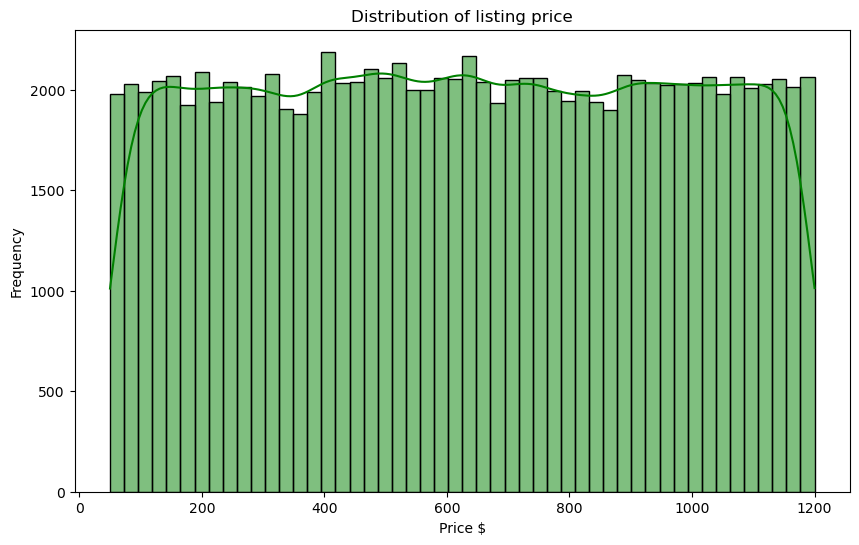

In [18]:
# Create a figure with specified size (10x6 inches)
plt.figure(figsize=(10,6))
# Create a histogram of the 'price' column with 50 bins, kernel density estimate and green color
sns.histplot(df['price'], bins=50, kde=True, color='green')
# Add a title to the plot
plt.title("Distribution of listing price")
# Label the x-axis
plt.xlabel("Price $")
# Label the y-axis
plt.ylabel("Frequency")
# Display the plot
plt.show()

## Conclusion
The histogram represents that the distribution of listing prices appears to be approximately uniform across the range from 0 to 1200 dollars . It shows that:
1. Listings are fairly evenly distributed across price ranges.
2. There is no strong skewness or concentration of listings at any specific price range.  
3. The data does not show a typical bell-curve (normal distribution) or any outliers that dominate.

## 2.How are the various room types distributed?

In [19]:
# Access the 'room type' column from the DataFrame df
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

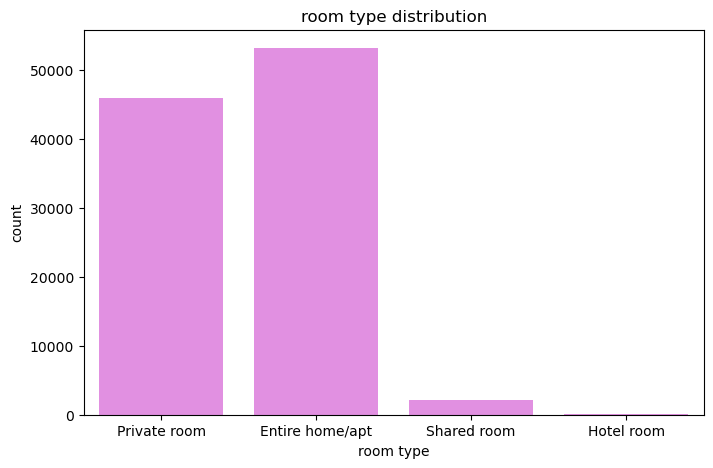

In [20]:
# Create a figure with specified size (8 inches width, 5 inches height)
plt.figure(figsize = (8,5))
# Create a count plot showing the distribution of 'room type' variable in the dataframe
sns.countplot(x='room type', data=df, color='violet')
# Add a title to the plot
plt.title('room type distribution')
# Label the x-axis
plt.xlabel('room type')
# Label the y-axis
plt.ylabel('count')
# Display the plot
plt.show()

## Conclusion

This bar chart displays the distribution of room types in the dataset. It indicates that:
1. Entire home/apartment is the most common listing type, with the highest count of over 50000 listings.
2. Private rooms are the second most common, with around 45000 listings.
3. Shared rooms have a significantly lower count, showing limited popularity.
4. Hotel rooms are almost negligible in the dataset, indicating very few such listings.
5. The market is dominated by individual or home-based rentals rather than commercial hotel-style options.
6. This distribution suggests that the platform is primarily used for short-term rentals of private or entire residential spaces.

## 3.What is the distribution of listings across different neighbourhoods?

Available columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']
Possible neighbourhood columns: ['neighbourhood group', 'neighbourhood']


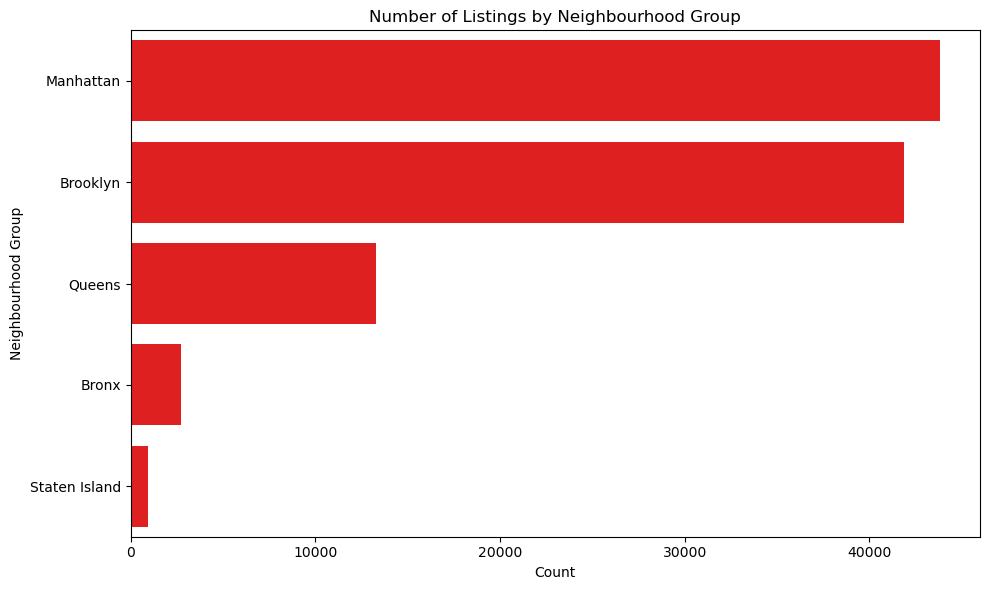

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data with low_memory=False to handle mixed data types
# The dtype parameter ensures 'house_rules' is treated as string to avoid mixed type warnings
df = pd.read_csv('airbnb_Open_Data.csv', dtype={'house_rules': str}, low_memory=False)

# Display all column names to identify the correct neighbourhood column
print("Available columns:", df.columns.tolist())

# Search for columns that might contain neighbourhood information
# This helps identify potential column name variations (e.g., neighbourhood vs neighborhood)
neighbourhood_columns = [col for col in df.columns if 'neigh' in col.lower()]
print("Possible neighbourhood columns:", neighbourhood_columns)

# Define the correct column name for neighbourhood data
# This will be updated after examining the actual column names in the dataset
correct_column = 'neighbourhood group' 

# Clean and standardize neighbourhood names:
# 1. Strip whitespace and convert to lowercase for consistent processing
# 2. Fix common spelling variations and errors using a mapping dictionary
df[correct_column] = df[correct_column].str.strip().str.lower()
fix_dict = {
    'manhatan': 'manhattan',
    'brookln': 'brooklyn',
    'staten island': 'staten island',
    'queens': 'queens',
    'bronx': 'bronx',
    'manhattan': 'manhattan',
    'brooklyn': 'brooklyn'
}
df[correct_column] = df[correct_column].replace(fix_dict).str.title()

# Create a bar chart showing the distribution of listings across neighbourhood groups
plt.figure(figsize=(10, 6))
# Use countplot with sorted values (most frequent first) for better visualization
sns.countplot(data=df, y=correct_column, order=df[correct_column].value_counts().index, color='red')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
# Adjust layout to prevent label cutoff
plt.tight_layout()  

## Data Cleaning Summary

1. The above code standardizes the entries in the *neighbourhood group* column by converting all text to lowercase, removing extra spaces and applying title case formatting to ensure consistency across the dataset.
2. It corrects common spelling errors and inconsistent labels such as "manhatan" to "Manhattan" and "brookln" to "Brooklyn" using a predefined replacement dictionary.
3. These cleaning steps significantly improve the quality of the data, allowing for accurate grouping and analysis without duplication or misclassification due to inconsistent naming.

## Conclusion of Countplot
After cleaning the dataset and correcting common spelling errors and inconsistencies in the `neighbourhood group` column, the bar chart shows the actual distribution of Airbnb listings across the five recognized neighbourhood groups in New York City.

**Key Observations**:
1. Manhattan has the highest number of listings, indicating it is the most popular area for Airbnb hosts and travellers.
2. Brooklyn follows closely behind Manhattan in terms of listing volume.
3. Queens has a moderate number of listings, showing a decent level of Airbnb activity.
4. Bronx and Staten Island have the fewest listings, indicating lower Airbnb presence or popularity.
5. All rows with missing (`NaN`) or invalid neighborhood names were excluded, ensuring the chart reflects only clean, valid data.

## 4.How has the number of reviews evolved over time?

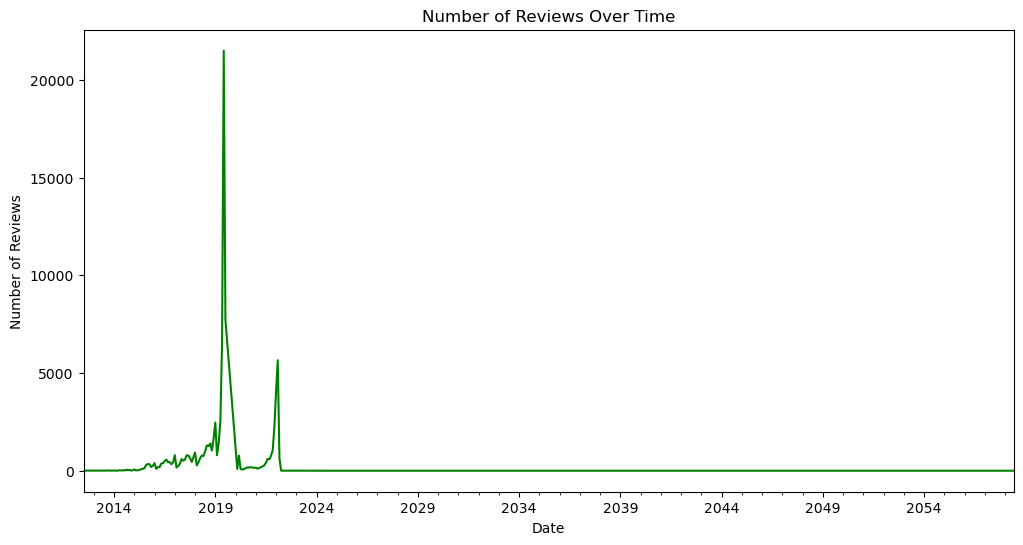

In [22]:
# Convert 'last review' column to datetime format for time-based operations
df['last review'] = pd.to_datetime(df['last review'])

# Group reviews by month and count them to see trends over time
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

# Create a figure with specified dimensions (width=12, height=6 inches)
plt.figure(figsize=(12,6))

# Plot the time series data as a line graph with green color
reviews_over_time.plot(kind='line' ,color='green')

# Add a title to the plot
plt.title('Number of Reviews Over Time')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()

## Conclusion

1. Sharp Peaks in Review Counts:
 There are extremely high spikes in the number of reviews around 2018-2020, with one spike exceeding 20000 reviews.These 
are likely outliers.
3. Sudden Drops:
 After these peaks, the number of reviews drops sharply, indicating that the spikes were temporary events rather than sustained growth.
4. Flat line after 2021:
 Post-2021, the number of reviews remains consistently low and almost flat.This suggests either no new data was collected or there was a 
drop in user activity.
5. Possible Data Anomalies:
 The presence of review data extending up to 2060 is unrealistic and suggests there may be issues with date parsing or incorrect date entries
in the dataset.

In [23]:
# Import pandas library for data manipulation
import pandas as pd 
# Read the Airbnb dataset into a DataFrame, with low_memory=False to avoid mixed data type warnings
df = pd.read_csv("airbnb_Open_Data.csv", low_memory=False)  # Fixed: moved parameter inside parentheses
# Convert 'last review' column to datetime format, with errors='coerce' to handle invalid dates
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
# Remove rows with missing values in the 'last review' column
df = df.dropna(subset=['last review'])
# Filter the DataFrame to include only rows where 'last review' date is not in the future
df = df[df['last review'] <= pd.Timestamp.today()]

## Data Cleaning Summary
This code cleans the `last review` column in the Airbnb dataset to prepare it for accurate time-based analysis. The purpose of this cleaning process is to ensure the `last review` column is accurate and usable for time-based analysis. This is done by converting the column to a valid datetime format while handling errors gracefully, removing rows with missing (`NaT`) review dates, and filtering out any reviews dated in the future. These steps help maintain the integrity of the timeline data.

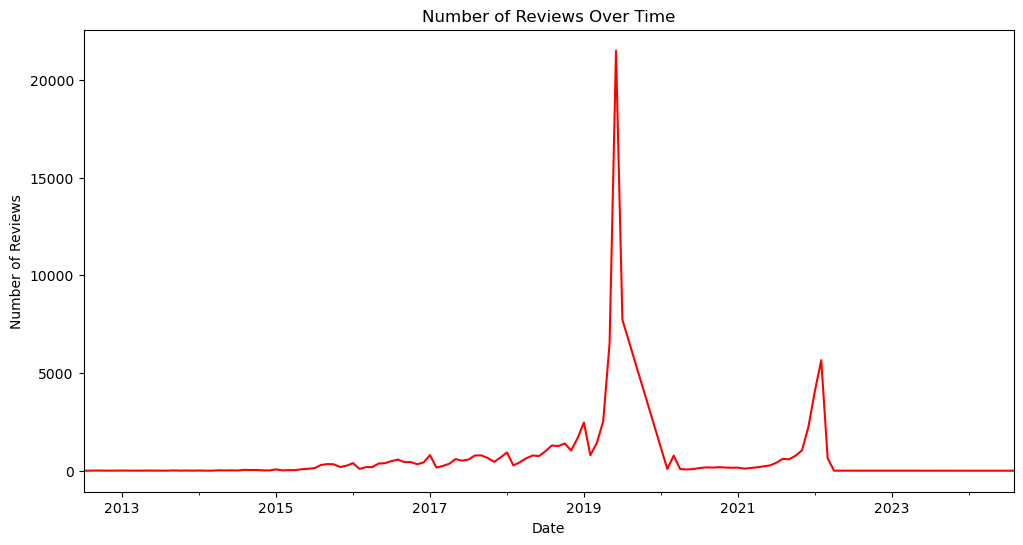

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Group reviews by month and count them
# Convert the 'last review' column to monthly periods and count occurrences
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Plot the time series data as a line chart with red color
reviews_over_time.plot(kind='line', color='red')

# Add title and axis labels to the plot
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()

## Conclusion

####  **Before Cleaning (Old Chart):**

1. The chart showed dates extending unrealistically up to 2060, indicating parsing errors or corrupted entries.
2. These invalid dates distorted the x-axis, compressing the real data and making the timeline hard to interpret.
3. A flatline after 2023 gave a misleading appearance of ongoing activity, even though it was due to incorrect future dates.
4. Overall, the data was not suitable for time-series analysis due to anomalies.

####  **After Cleaning (New Chart):**

1. We fixed date issues using:
   * `errors='coerce'` to convert invalid dates to `NaT`,
   * `dropna()` to remove missing values,
   * and filtering out future dates using `df['last review'] <= pd.Timestamp.today()`.
2. The new chart now includes only valid, past review data, up to the current date.
3. Real trends became visible:
   * A sharp spike in reviews around 2019.
   * A notable drop in 2020, likely reflecting the impact of the COVID-19 pandemic.
   * A resurgence in activity in 2021–2022.
4. The timeline is now accurate, clean, and interpretable, showing real-world trends clearly.

## Conclusion

1. Listings with low to moderate prices (between 10 and 300 USD) receive the highest number of reviews.
2. Listings priced above 500 USD tend to receive fewer reviews, indicating lower booking frequency or a niche market.
3. The majority of reviews are concentrated in the price range of 30–200 USD, suggesting this is the most active and competitive price segment.
4. A large number of listings with very few reviews (1–10) exist across almost all price points, which could indicate new listings or low popularity.
5. There is no strong positive correlation between price and number of reviews—cheaper listings often receive more reviews, possibly due to higher booking volume.

## 5.Which neighbourhoods have the most listings?

<Axes: title={'center': 'Top 10 Neighbourhoods by Listings'}, ylabel='neighbourhood'>

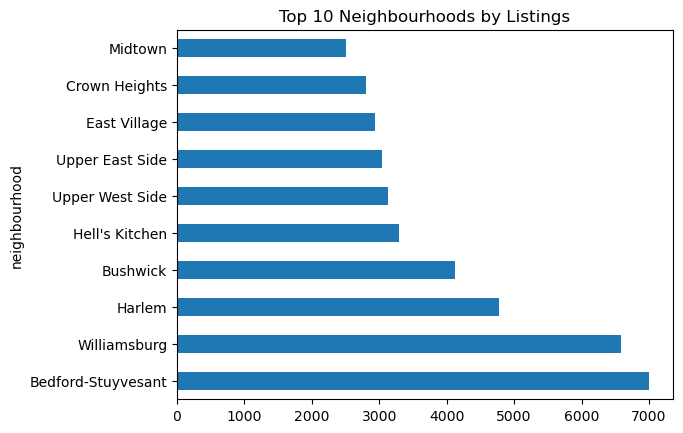

In [25]:
# Create a horizontal bar chart showing the top 10 neighborhoods by number of listings
# 1. Count occurrences of each neighborhood using value_counts()
# 2. Select only the top 10 neighborhoods with head(10)
# 3. Plot as a horizontal bar chart with appropriate title
df['neighbourhood'].value_counts().head(10).plot(kind='barh', title='Top 10 Neighbourhoods by Listings')

## Conclusion

1. Bedford-Stuyvesant has the highest number of listings, followed closely by Williamsburg, both exceeding 6,000 listings.
2. Harlem and Bushwick also show strong listing volumes, each around 4,000–5,000 listings, indicating high activity in these areas.
3. Hell's Kitchen, Upper West Side and Upper East Side fall in the mid-range, with around 3,000–4,000 listings.
4. East Village, Crown Heights and Midtown have slightly lower but still significant listing counts (approximately 2,500–3,000).
5. Overall, most high-listing neighborhoods are located in Brooklyn and Manhattan, suggesting these areas are Airbnb hotspots and likely to attract high guest demand.


## 6.Monthly trend of reviews (activity over time)

<Axes: title={'center': 'Monthly Review Activity'}, xlabel='review_month'>

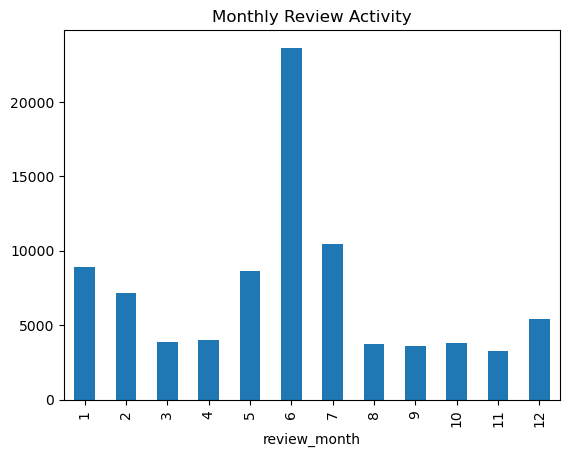

In [26]:
# Convert 'last review' column to datetime format, handling errors by setting them as NaT
# This ensures dates are properly formatted for time-based analysis
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Extract the month component from the datetime values in 'last review' column
# This allows us to analyze review patterns by month
df['review_month'] = df['last review'].dt.month

# Create a bar chart showing the distribution of reviews by month
# First count occurrences of each month, sort them chronologically, then plot
# This visualization helps identify seasonal patterns in review activity
df['review_month'].value_counts().sort_index().plot(kind='bar', title='Monthly Review Activity')

## Conclusion

1. The highest number of reviews occurs in June, with a significant spike in activity, indicating that June is the most popular month for guests to leave reviews—possibly due to increased travel during summer.
2. July and January also see relatively high review activity, suggesting consistent engagement during mid-summer and the New Year season.
3. The lowest review activity is observed in March, April, September, October and November, indicating these months are less active, likely off-peak travel times.
4. The trend shows a seasonal pattern, with summer months (June–July) being the most active, aligning with typical vacation periods.

## 7.Impact of cancellation policy on pricing

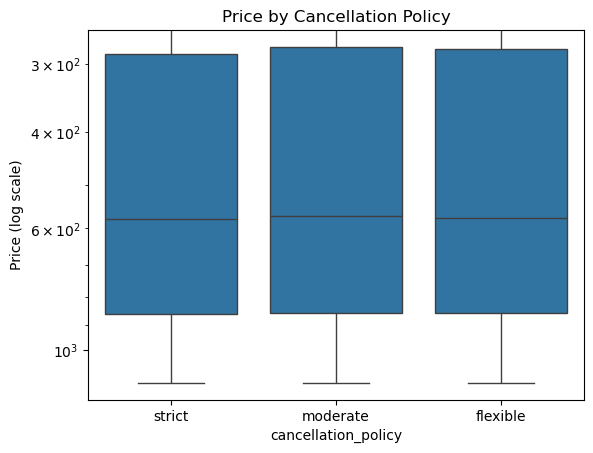

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot showing price distribution across different cancellation policies
sns.boxplot(data=df, x='cancellation_policy', y='price')
# Set y-axis to logarithmic scale to better visualize price variations
plt.yscale('log')
# Add title to the plot
plt.title('Price by Cancellation Policy')
# Add label to y-axis indicating log scale
plt.ylabel('Price (log scale)')  # <-- added this line to show log scale on y-axis label
# Display the plot
plt.show()

## Conclusion
1. The price distributions for all three cancellation policies-strict, moderate and flexible—appear to be very similar, with comparable medians and ranges.
2. The use of a logarithmic scale on the y-axis helps reveal that price variability exists in all categories, but no specific policy shows significantly higher or lower prices.
3. This indicates that cancellation policy does not have a strong influence on listing price.
4. The spread of prices (interquartile range and whiskers) suggests that regardless of policy, prices can range widely, likely influenced more by other factors such as location, property type or amenities.
Overall, hosts may choose their cancellation policy based on preference or risk tolerance without expecting it to drastically impact their pricing.
